Loading the cleaned dataset...
Analyzing text length distribution...

Descriptive Statistics for Word Count:
count    232.000000
mean      47.948276
std       25.158664
min       11.000000
25%       29.000000
50%       41.000000
75%       62.000000
max      131.000000
Name: word_count, dtype: float64

Generating histogram for word count distribution...


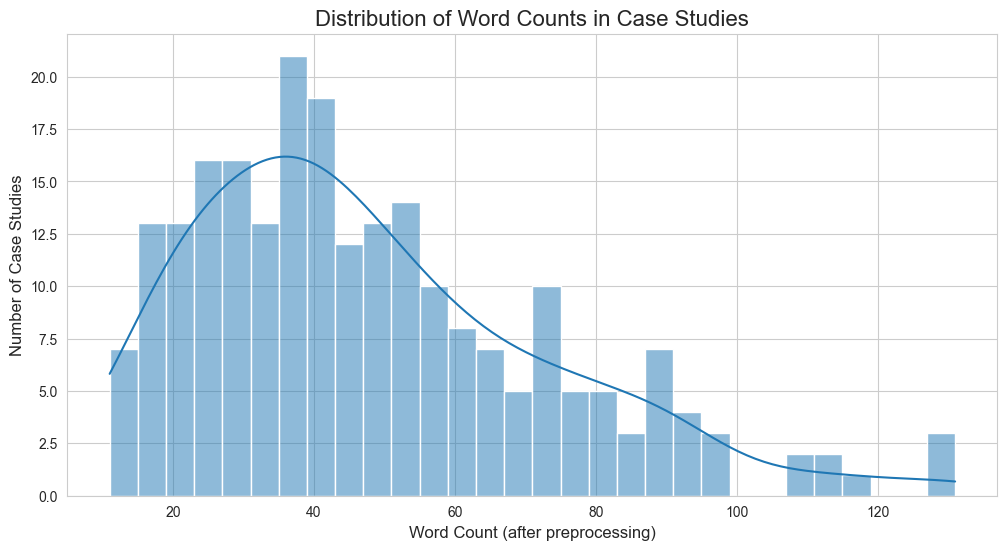

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast # Used to safely evaluate a string containing a Python literal

# --- Load the Cleaned Data ---
print("Loading the cleaned dataset...")
df = pd.read_csv('vwo_corpus_cleaned.csv')

# --- Data Preparation ---
# The 'cleaned_tokens' column is currently a string that looks like a list.
# We need to convert it back into an actual Python list to work with it.
# ast.literal_eval safely evaluates a string to a Python object.
try:
    df['cleaned_tokens'] = df['cleaned_tokens'].apply(ast.literal_eval)
except (ValueError, SyntaxError):
    print("Could not parse the 'cleaned_tokens' column. It might not be in the expected list format.")
    # Handle error or exit if necessary

# --- Analyze Text Length ---
print("Analyzing text length distribution...")

# Create a new column 'word_count' by calculating the length of each list in 'cleaned_tokens'.
df['word_count'] = df['cleaned_tokens'].apply(len)

# Display basic descriptive statistics for our word counts.
print("\nDescriptive Statistics for Word Count:")
print(df['word_count'].describe())


# --- Visualize the Distribution ---
print("\nGenerating histogram for word count distribution...")

# Set the visual style for our plots
sns.set_style('whitegrid')

# Create a figure and axes for the plot
plt.figure(figsize=(12, 6))

# Generate the histogram using Seaborn
sns.histplot(df['word_count'], bins=30, kde=True)

# Add informative labels and a title
plt.title('Distribution of Word Counts in Case Studies', fontsize=16)
plt.xlabel('Word Count (after preprocessing)', fontsize=12)
plt.ylabel('Number of Case Studies', fontsize=12)

# Display the plot
plt.show()

This histogram visualises the length of the case studies after preprocessing. The primary cluster of bars peaks around the 40-word mark, indicating that the majority of documents in our corpus are relatively short. 

The distribution is right-skewed, showing a tail of fewer, longer documents. Overall, this confirms our corpus is largely consistent in length, which is what we need for further analysis

Analyzing word frequencies across the entire corpus...

Top 25 Most Common Words:
[('company', 148), ('website', 144), ('online', 104), ('conversion', 92), ('marketing', 81), ('product', 77), ('optimization', 75), ('vwo', 70), ('service', 67), ('experience', 64), ('team', 64), ('business', 62), ('customer', 61), ('one', 58), ('digital', 56), ('test', 53), ('agency', 50), ('help', 46), ('rate', 45), ('client', 45), ('platform', 43), ('brand', 42), ('testing', 40), ('offer', 40), ('solution', 37)]

Generating bar chart for most common words...


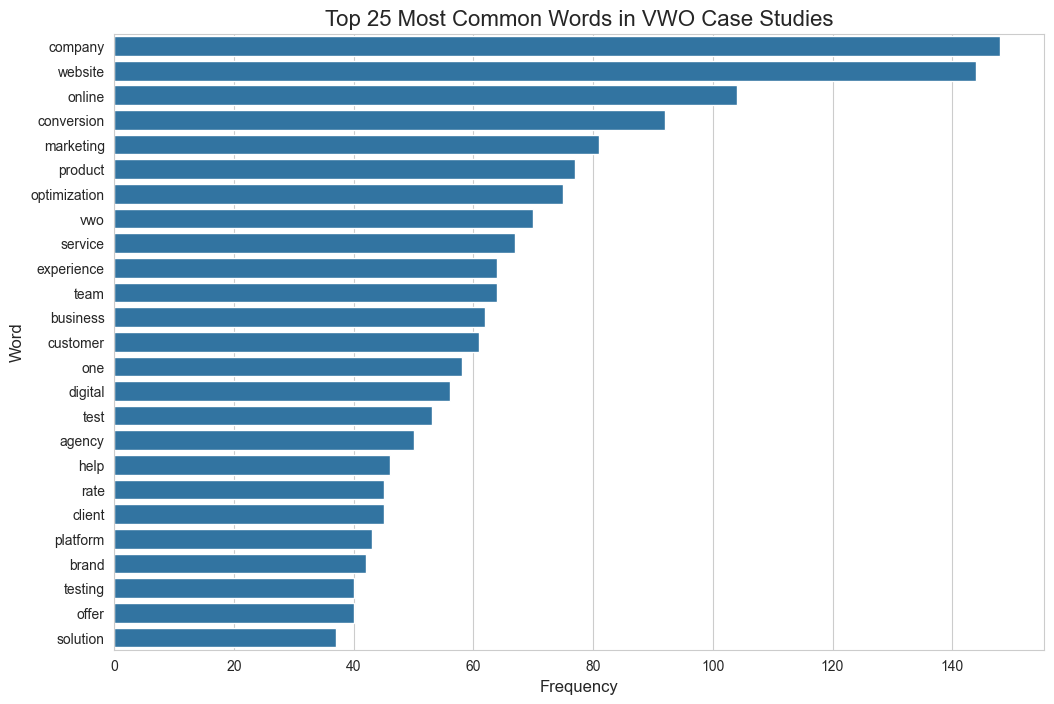

In [2]:
import nltk
from nltk.probability import FreqDist

# --- Analyze Word Frequencies ---
print("Analyzing word frequencies across the entire corpus...")

# Create a single list containing all tokens from all case studies
all_tokens = [token for sublist in df['cleaned_tokens'] for token in sublist]

# Calculate the frequency distribution of all tokens
freq_dist = FreqDist(all_tokens)

# Get the 25 most common words
most_common_words = freq_dist.most_common(25)

print("\nTop 25 Most Common Words:")
print(most_common_words)


# --- Visualize the Frequency Distribution ---
print("\nGenerating bar chart for most common words...")

# Convert the list of tuples to a Pandas DataFrame for easy plotting
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create a figure and axes for the plot
plt.figure(figsize=(12, 8))

# Generate the bar plot using Seaborn
sns.barplot(x='Frequency', y='Word', data=common_words_df)

# Add informative labels and a title
plt.title('Top 25 Most Common Words in VWO Case Studies', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)

# Display the plot
plt.show()

This bar chart displays the most frequent words across all documents. The prominence of terms like company, website, conversion, and marketing strongly validates that our dataset is highly relevant to the domain of conversion rate optimization. The high frequency of vwo also confirms the specific context of our data source. This gives us confidence that the corpus is on-topic.

In [6]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# --- Analyze Word Phrases (Bigrams) ---
print("Analyzing word phrases (bigrams)...")

# Use the NLTK BigramCollocationFinder to find common word pairs
bigram_finder = BigramCollocationFinder.from_words(all_tokens)

# We are interested in the 20 best bigrams, scored by their frequency
# Other scoring methods exist to find more statistically significant pairs but for now this is okay
bigrams = bigram_finder.nbest(BigramAssocMeasures.raw_freq, 20)

print("\nTop 20 Most Common Bigrams (Phrases):")
print(bigrams)

Analyzing word phrases (bigrams)...

Top 20 Most Common Bigrams (Phrases):
[('conversion', 'rate'), ('success', 'story'), ('digital', 'marketing'), ('marketing', 'agency'), ('got', 'touch'), ('optimize', 'website'), ('using', 'vwo'), ('improve', 'conversion'), ('rate', 'optimization'), ('ab', 'test'), ('company', 'hired'), ('online', 'marketing'), ('us', 'thevwo'), ('experience', 'optimization'), ('user', 'experience'), ('company', 'us'), ('social', 'medium'), ('thevwo', 'platformfor'), ('used', 'vwo'), ('conversion', 'optimization')]


The appearance of industry phrases like "conversion rate", "user experience", and "ab test" demonstrates that our preprocessing pipeline was successful in isolating the key concepts within the text. These phrases represent the fundamental topics of our corpus and will be crucial targets in our later classification task.

Methodology Pivot: From Broad Sample to Gold Standard Corpus
Initially, a random sample of 100 case studies was taken for manual labeling. This process revealed that a significant portion of the corpus text was too high-level for the intended classification task, with over 60% of items being correctly labeled as 'Other'.

To solve this, the strategy was pivoted. A feasibility scorer was developed to rank all 232 documents by their likelihood of containing detailed information. This allowed for a Targeted Data Enrichment step, where the top 50 most promising articles were fully scraped.

The following analysis, therefore, is performed on this curated 50-item "gold standard" corpus, which is smaller but significantly higher in quality and relevance

Having explored the corpus, the next phase of the project is to build and evaluate a predictive model. The goal is to train a machine learning classifier that can automatically identify the behavioral principles in the case study text.

To accomplish this, we will follow a standard machine learning workflow:

Data Splitting: We will first split our manually labeled "gold standard" data into a training set and a testing set using train_test_split. This is a critical step to ensure we can get an honest evaluation of our model's performance on data it has never seen before.

Feature Engineering: We will convert the text data into a numerical format using TfidfVectorizer. This is a standard technique in NLP that represents the importance of each word to each document.

Model Training: We will use a Linear Support Vector Classifier (LinearSVC), a powerful and efficient baseline model that is highly effective for text classification tasks.

Evaluation: Finally, we will use the model to make predictions on our unseen test set and evaluate its performance using a classification_report to see how well it learned to categorize the different behavioral principles.

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# --- Load the Labeled Data ---
print("Loading the labeled 'gold standard' dataset...")
labeled_df = pd.read_csv('gold_corpus.csv') 

# For this model, we will exclude the 'Other' category as it's not a coherent class
labeled_df = labeled_df[labeled_df['final_label'] != 'Other']
print(f"Loaded {len(labeled_df)} well-defined labeled examples.")

# --- Define Features (X) and Target (y) ---
# The 'body_text' column contains the text features.
# The 'final_label' column is what we want to predict.
X = labeled_df['body_text']
y = labeled_df['final_label']

# --- Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nData split: {len(X_train)} training examples and {len(X_test)} testing examples.")

# --- Vectorize the Text using TF-IDF ---
# Initialize the vectorizer.
vectorizer = TfidfVectorizer(max_features=1000) # Limit to the top 1000 features

# Fit the vectorizer ONLY on the training data to learn the vocabulary.
X_train_tfidf = vectorizer.fit_transform(X_train)

# Use the already-fitted vectorizer to transform the test data.
X_test_tfidf = vectorizer.transform(X_test)

print("Text has been converted to TF-IDF vectors.")

# --- Train the Classification Model ---
print("Training the LinearSVC model...")
# Initialize and train the model
model = LinearSVC()
model.fit(X_train_tfidf, y_train)
print("Model training complete.")

# --- Make Predictions on the Test Set ---
print("Making predictions on the unseen test data...")
y_pred = model.predict(X_test_tfidf)

# --- Evaluate Model Performance ---
print("\n--- Model Evaluation Report ---")
# Calculate the overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2f} ({accuracy:.0%})")

# Print a detailed report showing precision, recall, and f1-score for each label
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Loading the labeled 'gold standard' dataset...
Loaded 43 well-defined labeled examples.

Data split: 34 training examples and 9 testing examples.
Text has been converted to TF-IDF vectors.
Training the LinearSVC model...
Model training complete.
Making predictions on the unseen test data...

--- Model Evaluation Report ---
Overall Accuracy: 0.78 (78%)

Classification Report:
                      precision    recall  f1-score   support

           Authority       0.00      0.00      0.00         0
  Friction Reduction       1.00      1.00      1.00         1
Layout/Design Change       0.80      1.00      0.89         4
        Media Change       0.00      0.00      0.00         2
     Personalization       1.00      1.00      1.00         1
        Social Proof       1.00      1.00      1.00         1

            accuracy                           0.78         9
           macro avg       0.63      0.67      0.65         9
        weighted avg       0.69      0.78      0.73         9


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

The proof-of-concept model scored a promising accuracy score of 78% on the test data. A closer look at the classification report reveals that the model performed with high precision and recall on well-represented categories like Layout/Design Change and Friction Reduction. However, the model's performance was limited on sparse categories such as Media Change, which is an expected outcome given the small, pilot nature of our curated corpus. The important thing is that the feature engineering and modeling approach is sound, and its performance would be expected to increase significantly with a larger, more balanced dataset. However of course 78% is very high for a first pass and we will need to do some deeper investigation.



Generating the confusion matrix...


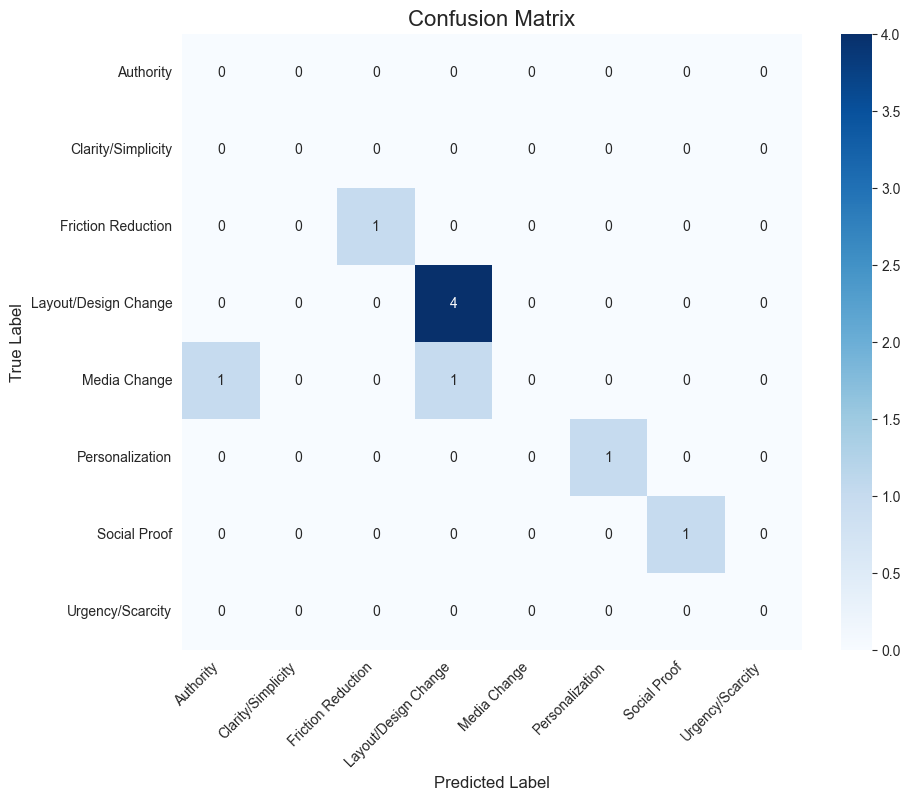

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 8. Deeper Evaluation: Confusion Matrix ---
print("Generating the confusion matrix...")


plt.figure(figsize=(10, 8))

# Create a visualization of the matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [11]:
import joblib

# --- Save the Model and Vectorizer for the App ---
print("Saving the trained model and vectorizer to disk...")


joblib.dump(vectorizer, 'vectorizer.joblib')


joblib.dump(model, 'model.joblib')

print("Files 'vectorizer.joblib' and 'model.joblib' have been saved.")

Saving the trained model and vectorizer to disk...
Files 'vectorizer.joblib' and 'model.joblib' have been saved.
